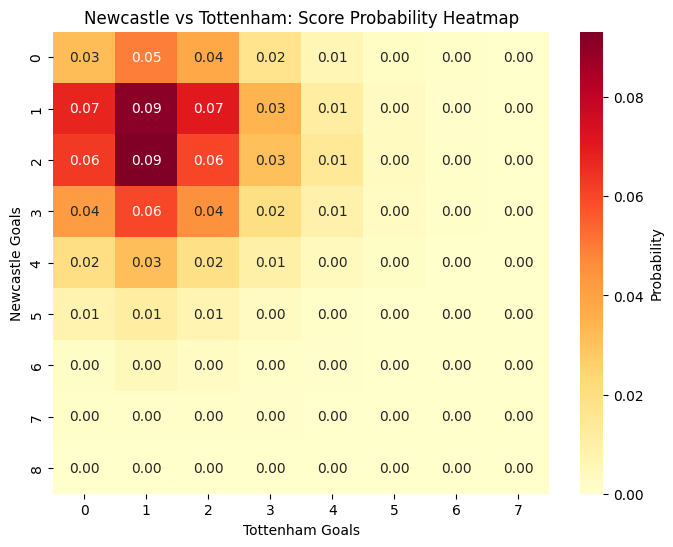

In [1]:
from stats_model import simulate_match
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Simulate match
result = simulate_match(
    "poisson",
    home_team="Newcastle United FC",
    away_team="Tottenham Hotspur FC",
    n_simulations=5000
)

scores = result["score_distribution"]

# Find max goals to set heatmap size
max_goals_home = max([int(score.split("-")[0]) for score in scores.keys()])
max_goals_away = max([int(score.split("-")[1]) for score in scores.keys()])

# Create 2D array for heatmap
heatmap_array = np.zeros((max_goals_home + 1, max_goals_away + 1))

for score, count in scores.items():
    h, a = map(int, score.split("-"))
    heatmap_array[h, a] = count

# Normalize by simulations for probabilities
heatmap_array /= 5000

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_array,
    annot=True,
    fmt=".2f",
    cmap="YlOrRd",
    cbar_kws={'label': 'Probability'},
    xticklabels=range(max_goals_away + 1),
    yticklabels=range(max_goals_home + 1)
)
plt.xlabel("Tottenham Goals")
plt.ylabel("Newcastle Goals")
plt.title("Newcastle vs Tottenham: Score Probability Heatmap")
plt.show()